# LDA收入预测

## 1.1 数据预处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = r'D:\JWE\Files\Courses\数据挖掘\work\第五章\data'
file_train = 'train.csv'
file_test = 'test.csv'
file_answer = 'correct_answer.csv'

train = pd.read_csv(path + '\\' + file_train)
test = pd.read_csv(path + '\\' + file_test)
answer = pd.read_csv(path + '\\' + file_answer)
income_data = pd.concat([train.copy(), test.copy()], sort=False)

In [3]:
income_data.head(20)
income_data.info()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


train,test均无缺失值，下对数据集作离散属性数值化，创建其哑变量特征。

PS：workclass属性中有？值，未解其意，也没有找到相关的数据说明，暂不当做缺失值。

In [4]:
# 查看各属性情况
for each in income_data.columns:
    each
    income_data[each].value_counts()

'age'

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

'workclass'

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

'fnlwgt'

203488    21
120277    19
190290    19
125892    18
126569    18
          ..
170272     1
137444     1
172327     1
111368     1
208174     1
Name: fnlwgt, Length: 28523, dtype: int64

'education'

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

'education_num'

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: education_num, dtype: int64

'marital_status'

 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital_status, dtype: int64

'occupation'

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

'relationship'

 Husband           19716
 Not-in-family     12583
 Own-child          7581
 Unmarried          5125
 Wife               2331
 Other-relative     1506
Name: relationship, dtype: int64

'race'

 White                 41762
 Black                  4685
 Asian-Pac-Islander     1519
 Amer-Indian-Eskimo      470
 Other                   406
Name: race, dtype: int64

'sex'

 Male      32650
 Female    16192
Name: sex, dtype: int64

'capital_gain'

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital_gain, Length: 123, dtype: int64

'capital_loss'

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2201        1
1421        1
1870        1
Name: capital_loss, Length: 99, dtype: int64

'hours_per_week'

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
94        1
79        1
82        1
87        1
Name: hours_per_week, Length: 96, dtype: int64

'native_country'

 United-States                 43832
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

'income'

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

参考：

[pandas独热编码函数](https://blog.csdn.net/weixin_43914889/article/details/104473950)

In [5]:
# 连续数值的属性不变，离散数值的属性进行独热编码
# 这里直接用pandas的函数，事实上可以进行更加细致的处理
data0 = pd.get_dummies(income_data)

In [6]:
data0.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
train_onehot = data0.iloc[:32561,:]
test_onehot = data0.iloc[32561:,:108]

## 1.2 LDA

In [8]:
X_train = train_onehot.iloc[:,:108].values
Y_train = train_onehot.iloc[:,108:].values
X_test = test_onehot.values

X1 = train_onehot.iloc[:,:108].loc[train_onehot['income_ <=50K'] == 1,:].values
X0 = train_onehot.iloc[:,:108].loc[train_onehot['income_ >50K'] == 1,:].values

X1_mean = np.mean(X1,axis=0)
X0_mean = np.mean(X0,axis=0)

Sigma1 = np.dot((X1 - X1_mean).T,X1 - X1_mean)
Sigma0 = np.dot((X0 - X0_mean).T,X0 - X0_mean)

S_w = Sigma1 + Sigma0

U,Sigma,VT = np.linalg.svd(S_w)

Sigma = np.diag(Sigma)

w = np.dot(np.dot(np.dot(VT.T,np.linalg.inv(Sigma)),U.T),X0_mean - X1_mean)

In [9]:
Xw = np.dot(X_train,w.reshape(108,1))

In [10]:
Y_predict = np.dot(X_test,w.reshape(108,1))

In [11]:
Z1 = []
Z0 = []

for i in range(len(X_train[:])):
    if (Y_train[i] == np.array([1,0])).all():
        Z1.append(Xw[i][0])
    if (Y_train[i] == np.array([0,1])).all():
        Z0.append(Xw[i][0])
        
Z1_mean = np.mean(Z1)
Z0_mean = np.mean(Z0)
divide = ( Z1_mean + Z0_mean )/ 2

Text(0.5, 1.0, '投影后')

D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


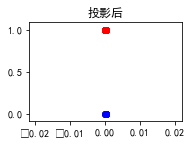

In [12]:
# 显示中字
plt.rcParams['font.sans-serif']=['SimHei']

# 绘图，红色正例，蓝色反例
fig = plt.figure()

ax2 = fig.add_subplot(2,2,2)
for i in range(len(X_train[:200])):
    if (Y_train[i] == np.array([1,0])).all():
        plt.scatter(Xw[i],1,c='r')
    if (Y_train[i] == np.array([0,1])).all():
        plt.scatter(Xw[i],0,c='b')
plt.title('投影后')
plt.show()

懒得调刻度了，所以画出来比较密集。

In [13]:
result = []
for i in range(len(Y_predict[:])):
    if Y_predict[i][0] <= divide:
        result.append(0)
    else:
        result.append(1)

In [14]:
LDA_output = pd.DataFrame({'id':[i+1 for i in range(len(result))],'label':result})
LDA_output.to_csv(r'D:\JWE\Files\Courses\数据挖掘\work\第五章\LDA_output.csv',index=False)

In [15]:
(answer == LDA_output).label.value_counts()

True     13144
False     3137
Name: label, dtype: int64

In [16]:
print(f'test上准确率:{13144/16281}')

test上准确率:0.8073214176033413


## 1.3 logistics

In [17]:
p_1 = lambda x,beta:1/(1 + np.exp(-np.dot(x,beta.T)))
grad_L = lambda x,beta,y:-sum(x * (y.reshape(len(y),1) - p_1(x=x,beta=beta)))

def gradient_descent(x,y,beta_cur=np.array([[0,0,1]]),alpha=10**(-2),precision=10**(-4),max_iters=10**(4)):
    for i in range(max_iters):
        grad_cur = grad_L(x=x,y=y,beta=beta_cur)
        if np.abs(grad_cur).all() < precision:
            break
        beta_cur = beta_cur - alpha * grad_cur
    return beta_cur

In [30]:
X_train_lr = np.c_[X_train,np.ones(len(X_train))]
Y_train_lr = np.array([1 if Y_train[i][0] == 1 else 0 for i in range(len(Y_train))]).reshape(len(Y_train),1)
X_test_lr = np.c_[X_test,np.ones(len(X_test))]
Y_test_lr = answer.values[:,1].reshape(len(answer.values),1)
beta0 = np.hstack((np.zeros(X_train.shape[1]),np.ones(1))).reshape(X_train.shape[1]+1,1)

beta_hat = gradient_descent(X_train_lr,Y_train_lr,beta_cur=beta0.T,alpha=10**-2,max_iters=10**5)
Y_hat_train = p_1(X_train_lr,beta_hat)
Y_hat_test = p_1(X_test_lr,beta_hat)
predict_train = Y_hat_train/(1 - Y_hat_train)
predict_test = Y_hat_test/(1 - Y_hat_test)
accuracy_train = sum([1 if i == j else 0 for i,j in zip([1 if each >= 1 else 0 for each in predict_train],Y_train_lr)])/len(Y_train_lr)
accuracy_test = sum([1 if i == j else 0 for i,j in zip([1 if each >= 1 else 0 for each in predict_test],Y_test_lr)])/len(Y_test_lr)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [31]:
accuracy_train
accuracy_test

0.7591904425539756

0.23622627602727106

In [62]:
LR_output = pd.DataFrame({'id':[i+1 for i in range(len(Y_test_lr))],'label':Y_test_lr.flatten()})
LR_output.to_csv(r'D:\JWE\Files\Courses\数据挖掘\work\第六章\LR_output.csv',index=False)

测试集上表现很差，没有解决。初步判断原因是数据预处理不当，增加了数据的维度（ps：理论上每个属性都应该相应处理，我全部都独热编码了，最后108维）。